In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# import CSV file
data = pd.read_csv('customerAskSheet.csv')

# get columns of data
columns = data.columns

# print columns
for line in columns:
    print(line)


age
workclass
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
income


# Univariate Data

## Pie Charts: These pie charts display the incomes of individuals based on their **education**.

### Grouping education data

In [49]:
data['education'] = data['education'].replace({' 9th': 'High School', ' 10th': 'High School', ' 11th': 'High School', ' 5th-6th': 'Elementary School', ' 12th': 'High School', ' 7th-8th': 'Middle School', ' 1st-4th': 'Elementary School', ' Assoc-voc': 'Associates', ' Assoc-acdm': 'Associates'})
print(data['education'].unique())

['High School' 'Elementary School' ' Some-college' ' HS-grad'
 'Middle School' ' Masters' ' Bachelors' 'Associates' ' Preschool'
 ' Doctorate' ' Prof-school']


### Income: <=50K

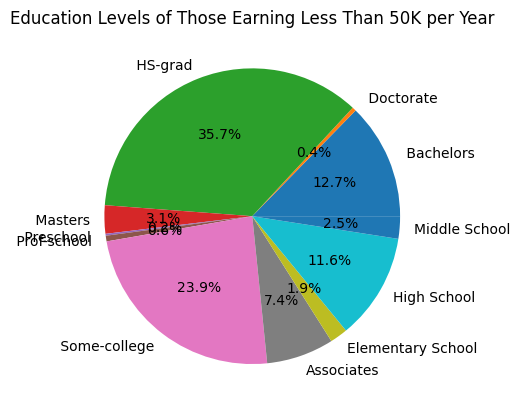

In [50]:
fig, ax = plt.subplots()
income_less_than_50k = data[data['income'] == ' <=50K'].groupby('education').size().plot(kind='pie', subplots=True, autopct='%1.1f%%', ax=ax)
plt.title('Education Levels of Those Earning Less Than 50K per Year')
plt.gca().set_aspect('equal')
plt.show()

### Income: >50K

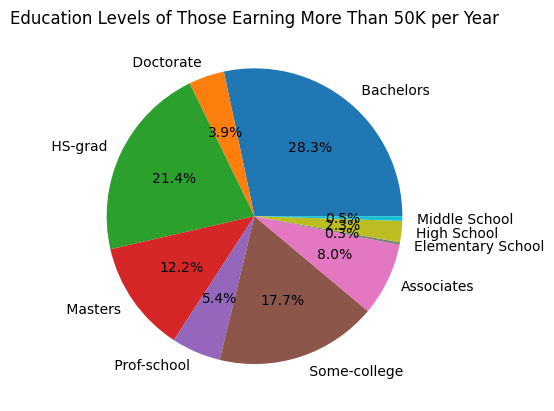

In [51]:
fig, ax = plt.subplots()
income_more_than_50k = data[data['income'] == ' >50K'].groupby('education').size().plot(kind='pie', subplots=True, autopct='%1.1f%%', ax=ax)
plt.title('Education Levels of Those Earning More Than 50K per Year')
plt.gca().set_aspect('equal')
plt.show()

## Line Charts: These line charts display the distribution of individuals' salary based on their **race**.

### Income: <=50K

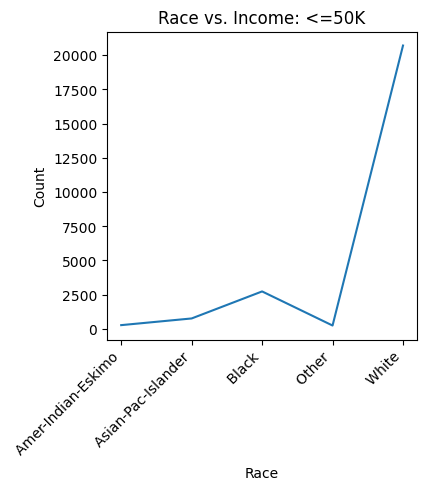

In [52]:
plt.figure(figsize=(4, 4))
data[data['income'] == ' <=50K'].groupby('race').size().plot(kind='line')
plt.xlabel('Race')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Race vs. Income: <=50K')
plt.show()

### Income: >50K

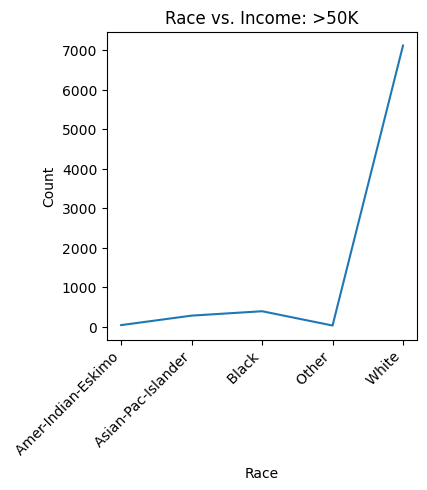

In [53]:
plt.figure(figsize=(4, 4))
data[data['income'] == ' >50K'].groupby('race').size().plot(kind='line')
plt.xlabel('Race')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Race vs. Income: >50K')
plt.show()

# Multivariate Data

## Scatter Plot Matrices: These scatter plot matrices display the **number of hours worked per week** that an individual works based on their **occupation**.
    - These scatter plot matrices show multiple scatter plots, each demonstrating the count of members who work a specific number of hours per week, with each plot representing a different occupation. In this case, the two sets of plots represent the income threshold of $50,000 that an individual falls under.

### Grouping occupation data

In [54]:
data['occupation'] = data['occupation'].replace({' None': 'None', ' Armed-Forces': 'Military or Defense', ' Exec-managerial':'Administrative and Management', ' Transport-moving':'Transportaton and Moving', ' Protective-serv': 'Protection Services', ' Tech-support': 'Professional Services and IT', ' Prof-specialty': 'Professional Services and IT', ' Craft-repair': 'Skilled Trades', ' Adm-clerical': 'Administrative and Management', ' Sales': 'Sales and Service', ' Other-service': 'Sales and Service', ' Handlers-cleaners': 'Sales and Service', ' Farming-fishing': 'Sales and Service', ' Priv-house-serv': 'Sales and Service', ' Machine-op-inspct': 'Sales and Service', ' 1st-4th': 'Elementary School', ' Assoc-voc': 'Associates', ' Assoc-acdm': 'Associates'})
print(data['occupation'].unique())

['None' 'Sales and Service' 'Administrative and Management'
 'Skilled Trades' 'Professional Services and IT' 'Protection Services'
 'Transportaton and Moving' 'Military or Defense']


### Income: <=50K

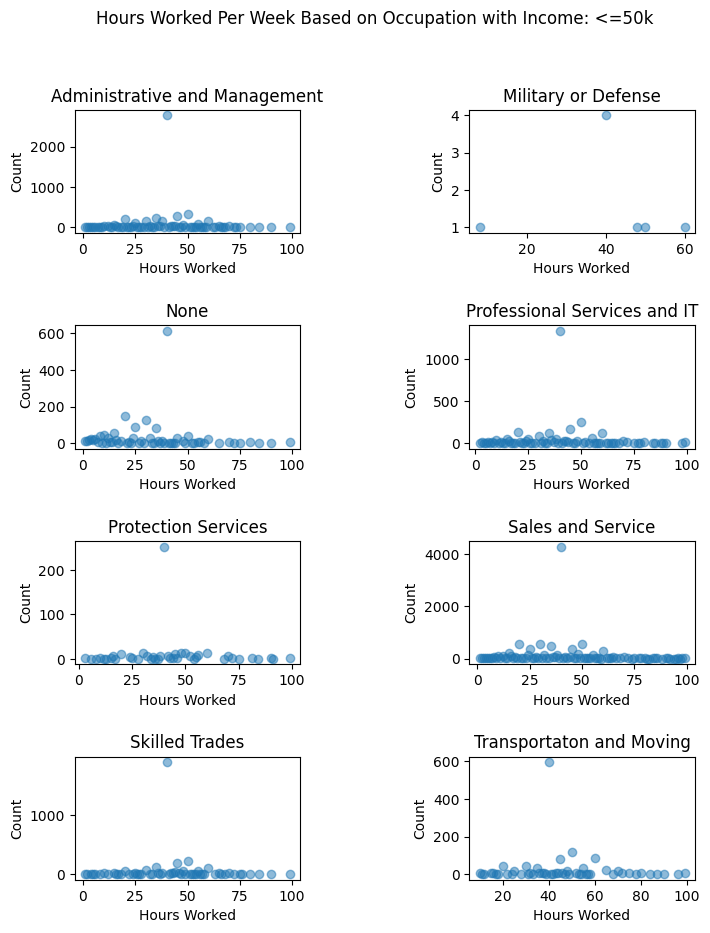

In [82]:
# Grouping the count of people by hours worked and occupation
filtered_data = data[data['income'] == ' <=50K']
grouped_data = filtered_data.groupby(['occupation', 'hours-per-week']).size().reset_index(name='count')

# Creating a scatter plot matrix
fig, axs = plt.subplots(4, 2, figsize=(8, 10))
plt.subplots_adjust(hspace=0.75, wspace=0.75)
for i, occupation in enumerate(grouped_data['occupation'].unique()):
    row = i // 2
    col = i % 2
    data_subset = grouped_data[grouped_data['occupation'] == occupation]
    axs[row, col].scatter(data_subset['hours-per-week'], data_subset['count'], alpha=0.5)
    axs[row, col].set_xlabel('Hours Worked')
    axs[row, col].set_ylabel('Count')
    axs[row, col].set_title(f'{occupation}')
plt.suptitle('Hours Worked Per Week Based on Occupation with Income: <=50k')
plt.show()



### Income: >50K

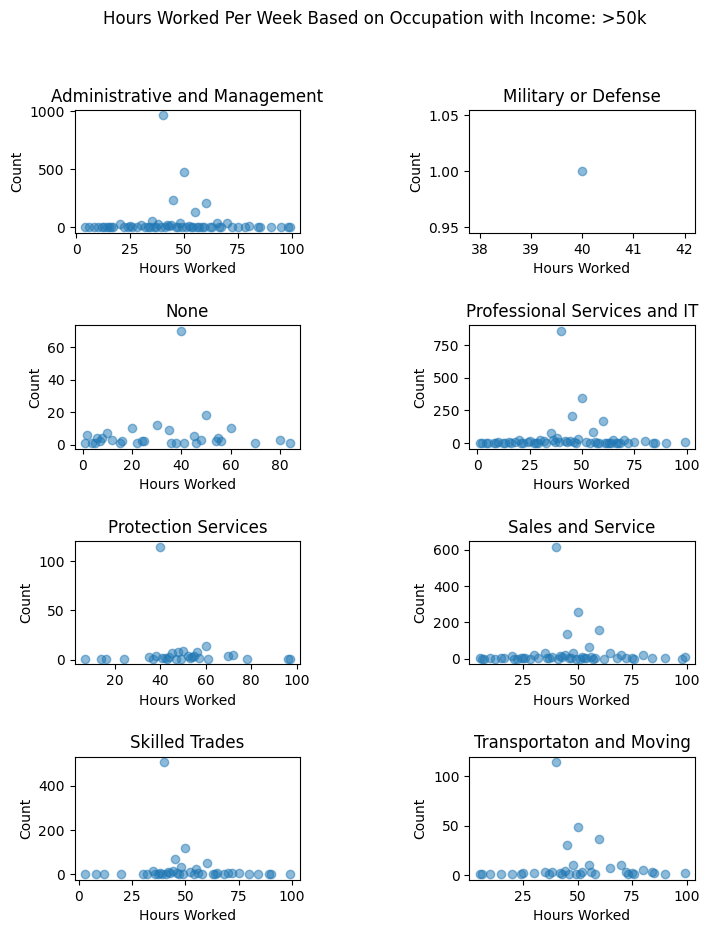

In [56]:
filtered_data = data[data['income'] == ' >50K']
grouped_data = filtered_data.groupby(['occupation', 'hours-per-week']).size().reset_index(name='count')

# Creating a scatter plot matrix
fig, axs = plt.subplots(4, 2, figsize=(8, 10))
plt.subplots_adjust(hspace=0.75, wspace=0.75)
for i, occupation in enumerate(grouped_data['occupation'].unique()):
    row = i // 2
    col = i % 2
    data_subset = grouped_data[grouped_data['occupation'] == occupation]
    axs[row, col].scatter(data_subset['hours-per-week'], data_subset['count'], alpha=0.5)
    axs[row, col].set_xlabel('Hours Worked')
    axs[row, col].set_ylabel('Count')
    axs[row, col].set_title(f'{occupation}')
plt.suptitle('Hours Worked Per Week Based on Occupation with Income: >50k')
plt.show()

## Mosaic Plots: These mosaic plots display the demographic of individuals based on their **sex** and **marital status**.
    - These plots consider the threshold of the income $50,000 and are divided as such. They visually show how the proportions of males and females are distributed across different marital status categories, which are grouped to be single, married, divorced, widowed, and separated. Overall, viewers are able to highlight any patterns or disparities in the distribution of marital status based on gender.

### Grouping marital status data and importing the mosaic library

In [57]:
from statsmodels.graphics.mosaicplot import mosaic

data['marital-status'] = data['marital-status'].replace({' Never-married': 'Single', ' Married-civ-spouse': 'Married', ' Married-spouse-absent': 'Married', ' Married-AF-spouse': 'Married'})
print(data['marital-status'].unique())  

['Single' 'Married' ' Divorced' ' Widowed' ' Separated']


### Income: <=50K

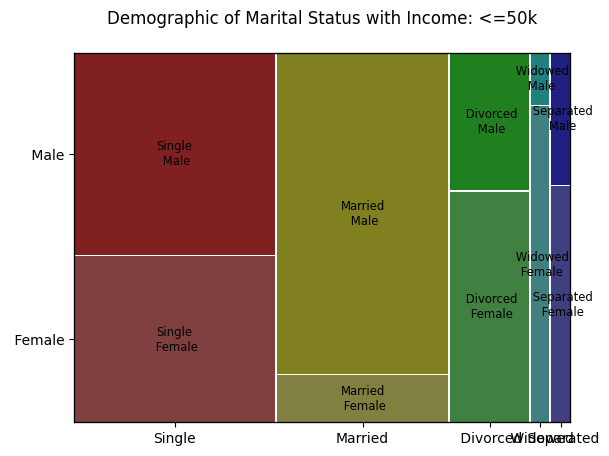

In [58]:
filtered_data = data[data['income'] == ' <=50K']
fig, _ = mosaic(filtered_data, ['marital-status', 'sex'])
plt.title("Demographic of Marital Status with Income: <=50k\n")
plt.show()

### Income: >50K

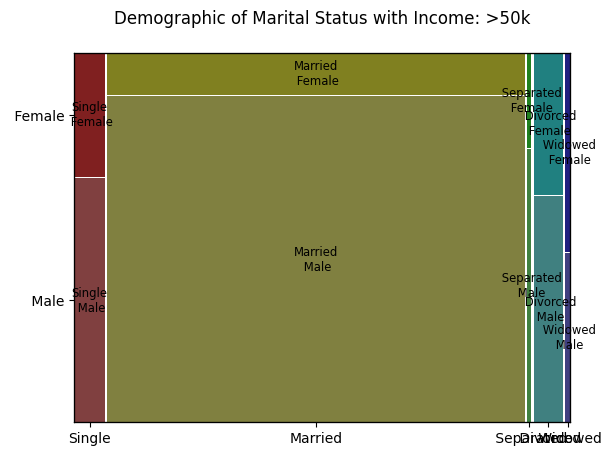

In [59]:
filtered_data = data[data['income'] == ' >50K']
fig, _ = mosaic(filtered_data, ['marital-status', 'sex'])
plt.title("Demographic of Marital Status with Income: >50k\n")
plt.show()

## Stacked Bar Charts: These stacked bar charts demonstrate the distribution of individuals of different **work classes** from different **countries and/or regions**.
    - These stacked bar charts show the total count of each work class category on the y-axis, with each bar divided into segments representing different countries and/or regions. The height of each bar represents the total count of work classes, and the segments show the distribution of work classes within each country. Like the other multivariate plots, the two plots provided demonstrate the difference in distribution based on their income of earning less than or more than $50,000.

### Grouping workclasses and native countries into countries and regions

In [79]:
data['workclass'] = data['workclass'].replace({' None': 'None', ' Private': 'Private', ' Self-emp-not-inc': 'Self-employed',
                                               ' Local-gov': 'Government', ' Self-emp-inc': 'Self-employed',
                                               ' State-gov': 'Government', ' Never-worked': 'Never worked', 
                                              ' Federal-gov': 'Government', ' Without-pay': 'Without pay'})
print(data['workclass'].unique())

['None' 'Private' 'Self-employed' 'Government' 'Never worked'
 'Without pay']


In [80]:
data['native-country'] = data['native-country'].replace({' United-States': 'USA', ' Mexico': 'Mexico', ' Philippines': 'Asia',
                                                        ' None': 'None', ' Puerto-Rico': 'US Territories', ' Canada': 'Canada',
                                                        ' Trinadad&Tobago': 'Carribean', ' Haiti': 'Carribean', ' El-Salvador':
                                                         'South America', ' Poland': 'Europe', ' England': 'Europe', ' Peru':
                                                         'South America', ' India': 'Asia', ' Dominican-Republic': 'Carribean',
                                                         ' Scotland': 'Europe', ' Germany': 'Europe', ' Columbia': 'South America',
                                                        ' Guatemala': 'Central America', ' Portugal': 'Europe', ' Thailand': 'Asia',
                                                         ' Japan': 'Asia', ' Laos': 'Asia', ' Nicaragua': 'Central America',
                                                         ' Hong': 'Asia', ' Yugoslavia': 'Europe', ' Taiwan': 'Asia',
                                                         ' France': 'Europe', ' Ecuador': 'South America', 
                                                         ' Outlying-US(Guam-USVI-etc)': 'US Territories', ' Cuba': 'Carribean', 
                                                         ' Greece': 'Europe', ' Iran': 'Asia', ' China': 'Asia', 
                                                         ' Ireland': 'Europe', ' Hungary': 'Europe', ' Cambodia': 'Asia', ' Jamaica': 'Carribean',
                                                         ' Holand-Netherlands': 'Europe', ' Honduras': 'Central America',
                                                        ' South': 'Asia', ' Vietnam': 'Asia', ' Italy': 'Europe'})
data = data.drop(data[data['native-country'] == 'None'].index)
print(data['native-country'].unique())

['USA' 'Mexico' 'Asia' 'US Territories' 'Canada' 'Carribean'
 'South America' 'Europe' 'Central America']


### Income: <=50K

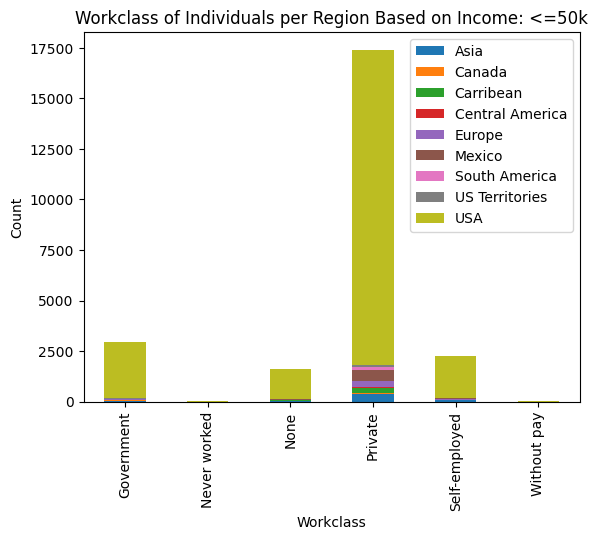

In [72]:
filtered_data = data[data['income'] == ' <=50K']
data_grouped = filtered_data.groupby(['workclass', 'native-country']).size().unstack().fillna(0)
data_grouped.plot(kind='bar', stacked=True)
plt.title("Workclass of Individuals per Region Based on Income: <=50k")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.legend()
plt.show()

### Income: >50K

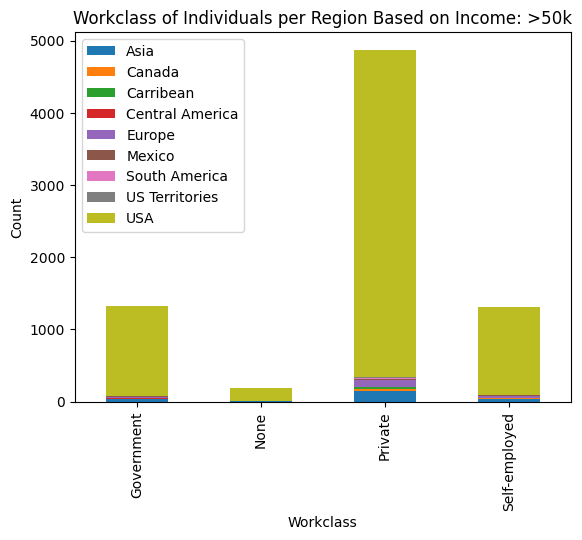

In [78]:
filtered_data = data[data['income'] == ' >50K']
data_grouped = filtered_data.groupby(['workclass', 'native-country']).size().unstack().fillna(0)
data_grouped.plot(kind='bar', stacked=True)
plt.title("Workclass of Individuals per Region Based on Income: >50k")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.legend()
plt.show()
